## Loading Packages

In [ ]:
# Mire meglett ez a kibaszott hdbscan package... és végül nem is működik. Helyette DBSCAN clustering-et alkalmazok.
import hdbscan
import umap
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Loading and Exploring Data

In [ ]:
url = 'https://storage.googleapis.com/superlinked-notebook-user-acquisiton-analytics/user_acquisiton_data.csv'
df = pd.read_csv(url)

In [ ]:
df.iloc[0,1]
df.head(3)
df.columns

Index(['id', 'signup_date', 'ad_creative', 'activity'], dtype='object')

## Creating String-based Vectors

In [ ]:
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(df['ad_creative'])

In [ ]:
variables = pd.DataFrame(embeddings)
variables.columns = [f"var{i+1}" for i in range(variables.shape[1])]

variables.head(5)

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var375,var376,var377,var378,var379,var380,var381,var382,var383,var384
0,0.044055,-0.037812,-0.046742,-0.058751,-0.030506,-0.007182,0.004631,-0.034763,-0.023560,0.032016,...,0.086414,0.029855,0.020063,0.117472,-0.007197,0.052057,0.083963,-0.056377,-0.104993,0.007351
1,0.028836,-0.031617,-0.009857,-0.026089,-0.040901,0.005985,0.035503,0.000702,-0.093927,0.048798,...,0.012260,0.060640,0.015442,0.103465,-0.000201,0.033084,0.081812,-0.019731,-0.088551,-0.021547
2,0.017432,-0.075919,-0.009621,-0.029945,0.006810,0.035520,0.050545,-0.017675,-0.036567,0.058980,...,0.026964,0.046765,0.022106,0.106689,0.026996,0.052468,0.061247,-0.044247,-0.111405,-0.016630
3,0.017432,-0.075919,-0.009621,-0.029945,0.006810,0.035520,0.050545,-0.017675,-0.036567,0.058980,...,0.026964,0.046765,0.022106,0.106689,0.026996,0.052468,0.061247,-0.044247,-0.111405,-0.016630
4,0.044055,-0.037812,-0.046742,-0.058751,-0.030506,-0.007182,0.004631,-0.034763,-0.023560,0.032016,...,0.086414,0.029855,0.020063,0.117472,-0.007197,0.052057,0.083963,-0.056377,-0.104993,0.007351


## Clustering

In [ ]:
clusterer = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = clusterer.fit_predict(variables)

cluster_labels

array([ 0,  1,  2, ...,  6,  6, 10], dtype=int64)

## Dimension Reduction

In [ ]:
reducer = umap.UMAP(random_state=20, n_neighbors=10, n_components=2, metric='euclidean')
embedding = reducer.fit_transform(variables)
bivalues = pd.DataFrame(embedding)

bivalues.head(5)


c:\Users\imre2\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,0,1
0,-9.096738,4.025567
1,-13.369172,-5.187746
2,-2.394631,-2.502319
3,-2.281008,-2.499649
4,-8.437615,4.159530


In [ ]:
bivalues.columns = ['x', 'y']
bivalues['color'] = pd.DataFrame(cluster_labels)
bivalues.head(5)

,x,y,color
0,-9.096738,4.025567,0
1,-13.369172,-5.187746,1
2,-2.394631,-2.502319,2
3,-2.281008,-2.499649,2
4,-8.437615,4.159530,0


## Visualization

In [ ]:
bivalues['color'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

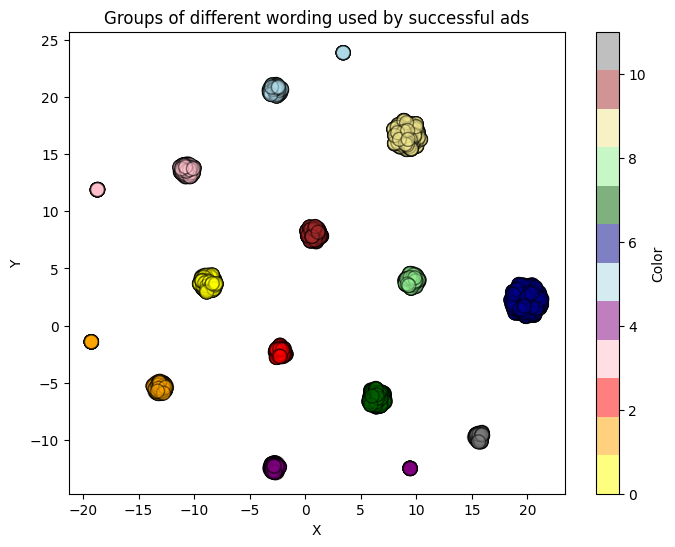

In [ ]:

plt.figure(figsize=(8, 6))
#cmap = ListedColormap(['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink', 'gray', 'olive'])
cmap = ListedColormap(['yellow', 'orange', 'red', 'pink', 'purple', 'lightblue', 'darkblue', 'darkgreen', 'lightgreen', 'khaki', 'brown', 'gray'])
plt.scatter(bivalues['x'], bivalues['y'], c=bivalues['color'], cmap=cmap, s=100, edgecolors='k', alpha=0.5)
plt.colorbar(label='Color')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Groups of different wording used by successful ads')
plt.show()